In [ ]:
''' 
load previously saved scores and plot them 
'''

In [1]:
import seaborn as sns #pip3 install seaborn
from datetime import date
import matplotlib.pyplot as plt
import os
import numpy as np
from errorfill import errorfill
trialTypes=['item1','item2','target','invalidThird','correct','catch','easyFiller','ctrlFiller'];
conds=['C1','C2','C3','C4','C all']


In [2]:
directory = '/home/data/Project_ASD/' + os.environ["USER"]+'/scores/'
fig_dir ='/home/data/Project_ASD/' + os.environ["USER"]+'/figures/'
filename='2020-10-22-1228-LR-L1-38x19520features-pca3-C3'
data = np.load(directory+filename+'.npz', allow_pickle=True)
mean_score = data['mean_score']
std_score = data['std_score']
test_C = data['test_C']
test_pca = data['test_pca']
best = data['best'] #score, c, pca
n_trtype, n_conds = mean_score.shape

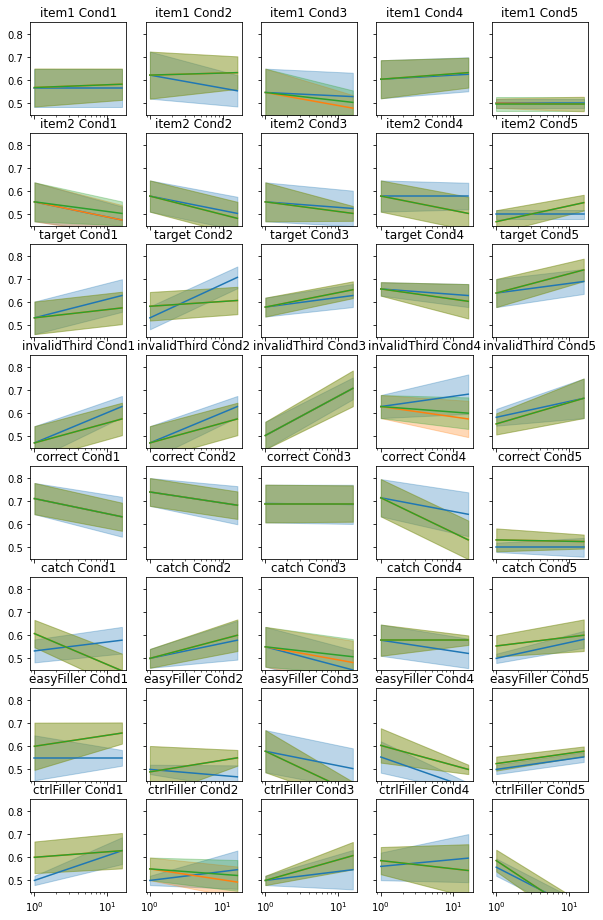

In [3]:
fig, ax = plt.subplots(n_trtype,n_conds,figsize=(n_conds*2,n_trtype*2),sharey=True,sharex=True)
for i in range(n_trtype):
    for j in range(n_conds):
            for k in range(test_C.shape[0]):
                errorfill(test_pca,mean_score[i,j][k].T, std_score[i,j][k].T/np.sqrt(5), ax=ax[i,j])
                ax[i,j].set_ylim(0.45,0.85)
                ax[i,j].title.set_text(trialTypes[i]+' '+'Cond'+str(j+1))
                ax[i,j].set_xscale('log')
plt.savefig(fig_dir+filename+'.png')


In [ ]:
# Plot best scores and parameters 
names=['best scores','best n_pca','best-c']
for i in range(3):
    fig = plt.figure(figsize=(4,5))
    r = sns.heatmap(best[:,:,i], cmap='BuPu',xticklabels=conds,yticklabels=trialTypes)#vmin=45, vmax=85
    r.set_title(names[i])
    plt.savefig(fig_dir+'heatmap-'+names[i]+'-'+filename+'.png')

In [ ]:
fig, ax = plt.subplots(1, n_trtype, figsize=(12,3))
for i in range(n_trtype):
    #print("Best parameter (CV score=%0.3f):" % search_8x1[i].best_score_)
    #print(search_8x1[i].best_params_)
    for k in range(test_pca.shape[0]):
        errorfill(test_C,search_8x1[i].
                  cv_results_['mean_test_score']
                  .reshape(test_C.shape[0],test_pca.shape[0])[:,k],
                  search_8x1[i].cv_results_['std_test_score']
                  .reshape(test_C.shape[0],test_pca.shape[0])[:,k]/np.sqrt(5),
                  ax=ax[i])

    ax[i].set_xscale('log')
    ax[i].set_ylim(0.45,0.85)
    ax[i].title.set_text(trialTypes[i])
    
plt.savefig(fig_dir+'fig-scores-8x1-'+run_8x1_identifier+'.png')


In [ ]:
for i in range(n_trtype):
    #print(np.abs(search_l1_all[i].best_estimator_['clf'].coef_))
    print(np.sum(np.abs(search_8x1[i].best_estimator_['clf'].coef_)>0.5e-2))
    plt.plot(search_8x1[i].best_estimator_['clf'].coef_.T)